In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
values = {
    'Analog' : [],
    'TDS' : []
}

In [21]:
analog_read = float(input("Masukkan data analog : "))
tds_data = float(input("Masukkan data TDS : "))

values['Analog'].append(analog_read)
values['TDS'].append(tds_data)


df = pd.DataFrame(values)
df.to_csv("../Stats/tds_regression.csv")
df.tail(5)

,Analog,TDS
8,1765.90,724.0
9,1793.91,761.0
10,1865.72,788.0
11,1905.61,840.0
12,401.69,172.0


<Axes: xlabel='Analog', ylabel='TDS'>

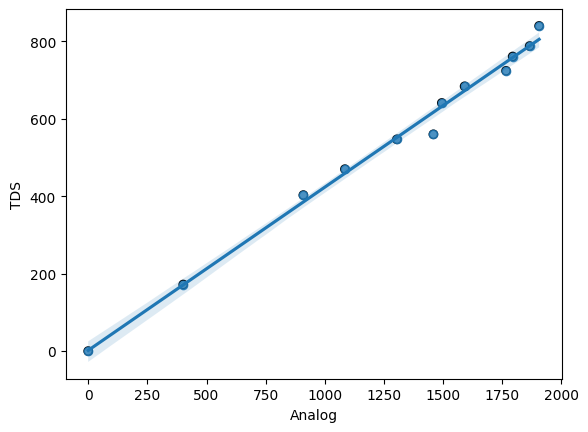

In [23]:
df = pd.read_csv('../Stats/tds_regression.csv')
plt.scatter(df['Analog'], df['TDS'], facecolors='none', edgecolors='k')
sns.regplot(x="Analog", y="TDS", data=df)

In [24]:
df = df.sort_values(by=['Analog'])
df = df.reset_index(drop=True)

coefficient of determination: 0.9921326882947834
intercept: 1.8543975663216088
slope: [0.42166085]
1.8543975663216088 + 0.4216608497232353 * analog


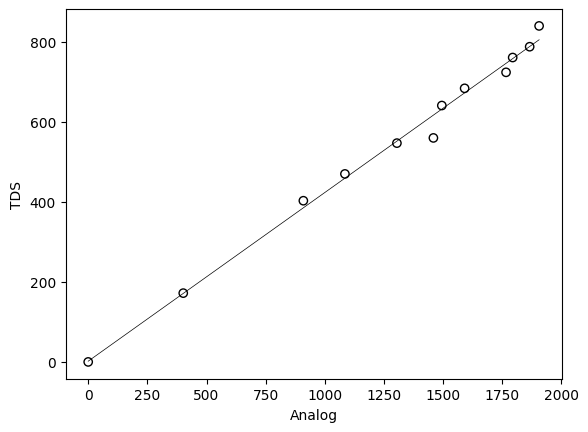

In [25]:
x_analog = df["Analog"].to_numpy().reshape((-1, 1))
y_tds = df["TDS"].to_numpy()

model = LinearRegression().fit(x_analog, y_tds)
r_sq = model.score(x_analog, y_tds)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


y_pred_voltage = model.intercept_ + model.coef_ * x_analog


print(f"{model.intercept_} + {model.coef_[0]} * analog")
plt.scatter(x_analog, y_tds, facecolors='none', edgecolors='k')
plt.xlabel('Analog')
plt.ylabel('TDS')
plt.plot(x_analog, y_pred_voltage, color='k', linewidth=0.5)
# plt.savefig('../Reading/img/regression.png')

plt.show()

In [1]:
1.8543975663216088 + 0.4216608497232353 * 500

212.68482242793925